In [1]:
import sys
sys.path.append('/Users/steeeve/Documents/csiss/streetview_crop_classification/cropClassification')

import geopandas as gpd
import pandas as pd
from sklearn.model_selection import train_test_split

from chipping import process_image_dataframe, display_img_lbl_pair, calculate_npy_dataset_mean_std


In [2]:
filtered_mask_json = "/Users/steeeve/Documents/csiss/data/maize_soyb_training.geojson"


In [3]:
gdf_filtered = gpd.read_file(filtered_mask_json, driver="GeoJSON")
gdf_filtered.head()

/Users/steeeve/miniconda3/envs/SAM2/lib/python3.10/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


,img_name,crop_type,mask_name,img_path,mask_path,mask_score,time,geometry
0,IMG_2022_001.jpg,Maize,IMG_2022_001_mask.jpg,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,/home/hanxli/data/data/mask_files/IMG_2022_001...,0.901633,2022-08-09 13:54:08,POINT (-134842.932 1983715.338)
1,IMG_2022_003.jpg,Soybean,IMG_2022_003_mask.jpg,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,/home/hanxli/data/data/mask_files/IMG_2022_003...,0.972062,2022-08-09 13:54:20,POINT (-134401.764 1983428.477)
2,IMG_2022_004.jpg,Soybean,IMG_2022_004_mask.jpg,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,/home/hanxli/data/data/mask_files/IMG_2022_004...,0.985273,2022-08-09 14:48:06,POINT (-134291.470 1983356.611)
3,IMG_2022_006.jpg,Soybean,IMG_2022_006_mask.jpg,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,/home/hanxli/data/data/mask_files/IMG_2022_006...,0.947928,2022-08-09 14:48:09,POINT (-133973.182 1983151.187)
4,IMG_2022_007.jpg,Maize,IMG_2022_007_mask.jpg,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,/home/hanxli/data/data/mask_files/IMG_2022_007...,0.950194,2022-08-09 13:55:58,POINT (-133639.877 1981696.371)


In [4]:
train_df, test_df = train_test_split(gdf_filtered, test_size=0.2, random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
train_df.head()

,img_name,crop_type,mask_name,img_path,mask_path,mask_score,time,geometry
0,IMG_2022_361.jpg,Soybean,IMG_2022_361_mask.jpg,/home/hanxli/data/data/all_sv_imgs/IMG_2022_36...,/home/hanxli/data/data/mask_files/IMG_2022_361...,0.990133,2022-08-11 11:42:38,POINT (92716.921 2028505.006)
1,IMG_2022_153.jpg,Maize,IMG_2022_153_mask.jpg,/home/hanxli/data/data/all_sv_imgs/IMG_2022_15...,/home/hanxli/data/data/mask_files/IMG_2022_153...,0.961253,2022-08-09 15:07:49,POINT (-58352.658 1957198.228)
2,IMG_2022_109.jpg,Maize,IMG_2022_109_mask.jpg,/home/hanxli/data/data/all_sv_imgs/IMG_2022_10...,/home/hanxli/data/data/mask_files/IMG_2022_109...,0.978089,2022-08-09 14:39:40,POINT (-87591.124 1958051.762)
3,IMG_2022_073.jpg,Maize,IMG_2022_073_mask.jpg,/home/hanxli/data/data/all_sv_imgs/IMG_2022_07...,/home/hanxli/data/data/mask_files/IMG_2022_073...,0.971559,2022-08-09 14:49:27,POINT (-115416.540 1960571.442)
4,IMG_2022_289.jpg,Soybean,IMG_2022_289_mask.jpg,/home/hanxli/data/data/all_sv_imgs/IMG_2022_28...,/home/hanxli/data/data/mask_files/IMG_2022_289...,0.971246,2022-08-11 11:16:36,POINT (58071.734 2025213.230)


In [5]:
train_out_path = "/Users/steeeve/Documents/csiss/data/masked_data_csiss/training"
val_out_path = "/Users/steeeve/Documents/csiss/data/masked_data_csiss/validation"
# Process the DataFrame to generate chips and a new DataFrame with chip info
chip_df = process_image_dataframe(train_df, 
                                  usage = "train", 
                                  chip_size=512, 
                                  overlap=32, 
                                  resized_size=224, 
                                  output_dir=train_out_path)

# Display the new DataFrame with chip information
chip_df.head()

Processing Images:   0%|          | 0/549 [00:00<?, ?it/s]

,img_chip_path,lbl_chip_path,origin_img,time_of_acquisition,crop_type,original_mask_score
0,images/IMG_2022_361_chip_0000.npy,masks/IMG_2022_361_mask_chip_0000.png,IMG_2022_361,2022-08-11 11:42:38,Soybean,0.990133
1,images/IMG_2022_361_chip_0001.npy,masks/IMG_2022_361_mask_chip_0001.png,IMG_2022_361,2022-08-11 11:42:38,Soybean,0.990133
2,images/IMG_2022_361_chip_0002.npy,masks/IMG_2022_361_mask_chip_0002.png,IMG_2022_361,2022-08-11 11:42:38,Soybean,0.990133
3,images/IMG_2022_361_chip_0003.npy,masks/IMG_2022_361_mask_chip_0003.png,IMG_2022_361,2022-08-11 11:42:38,Soybean,0.990133
4,images/IMG_2022_361_chip_0004.npy,masks/IMG_2022_361_mask_chip_0004.png,IMG_2022_361,2022-08-11 11:42:38,Soybean,0.990133


In [6]:
val_chip_df = process_image_dataframe(test_df, 
                                  usage = "validation", 
                                  chip_size=512, 
                                  overlap=32, 
                                  resized_size=224, 
                                  output_dir=val_out_path)

# Display the new DataFrame with chip information
val_chip_df.head()

Processing Images:   0%|          | 0/138 [00:00<?, ?it/s]

,img_chip_path,lbl_chip_path,origin_img,time_of_acquisition,crop_type,original_mask_score
0,images/IMG_2022_371_chip_0000.npy,masks/IMG_2022_371_mask_chip_0000.png,IMG_2022_371,2022-08-11 11:52:36,Maize,0.922808
1,images/IMG_2022_371_chip_0001.npy,masks/IMG_2022_371_mask_chip_0001.png,IMG_2022_371,2022-08-11 11:52:36,Maize,0.922808
2,images/IMG_2022_371_chip_0002.npy,masks/IMG_2022_371_mask_chip_0002.png,IMG_2022_371,2022-08-11 11:52:36,Maize,0.922808
3,images/IMG_2022_371_chip_0003.npy,masks/IMG_2022_371_mask_chip_0003.png,IMG_2022_371,2022-08-11 11:52:36,Maize,0.922808
4,images/IMG_2022_371_chip_0004.npy,masks/IMG_2022_371_mask_chip_0004.png,IMG_2022_371,2022-08-11 11:52:36,Maize,0.922808


/Users/steeeve/Documents/csiss/data/masked_data_csiss/training/
images/IMG_2022_073_chip_0017.npy


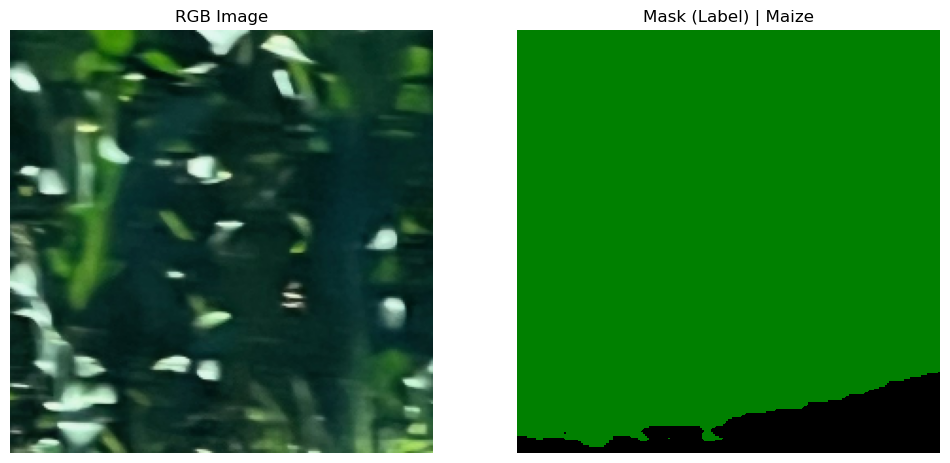

In [9]:
save_path = "/Users/steeeve/Documents/csiss/data/masked_data_csiss/training/"
display_img_lbl_pair(chip_df, 77, save_path=save_path)

In [10]:
save_path = "/Users/steeeve/Documents/csiss/data/masked_data_csiss/training/"
save_path_val = "/Users/steeeve/Documents/csiss/data/masked_data_csiss/validation/"
train_df_path = "/Users/steeeve/Documents/csiss/data/masked_data_csiss/training/train_chipping_csv.csv"
val_df_path = "/Users/steeeve/Documents/csiss/data/masked_data_csiss/validation/validation_chipping_csv.csv"

In [4]:
train_df = pd.read_csv(train_df_path, index_col=0)
val_df = pd.read_csv(val_df_path, index_col=0)

In [5]:
train_df.head(3)

,img_chip_path,lbl_chip_path,origin_img,time_of_acquisition,crop_type,original_mask_score
0,images/IMG_2022_361_chip_0000.npy,masks/IMG_2022_361_mask_chip_0000.png,IMG_2022_361,2022-08-11 11:42:38,Soybean,0.990133
1,images/IMG_2022_361_chip_0001.npy,masks/IMG_2022_361_mask_chip_0001.png,IMG_2022_361,2022-08-11 11:42:38,Soybean,0.990133
2,images/IMG_2022_361_chip_0002.npy,masks/IMG_2022_361_mask_chip_0002.png,IMG_2022_361,2022-08-11 11:42:38,Soybean,0.990133


In [6]:
val_df.head(3)

,img_chip_path,lbl_chip_path,origin_img,time_of_acquisition,crop_type,original_mask_score
0,images/IMG_2022_371_chip_0000.npy,masks/IMG_2022_371_mask_chip_0000.png,IMG_2022_371,2022-08-11 11:52:36,Maize,0.922808
1,images/IMG_2022_371_chip_0001.npy,masks/IMG_2022_371_mask_chip_0001.png,IMG_2022_371,2022-08-11 11:52:36,Maize,0.922808
2,images/IMG_2022_371_chip_0002.npy,masks/IMG_2022_371_mask_chip_0002.png,IMG_2022_371,2022-08-11 11:52:36,Maize,0.922808


In [7]:
calculate_npy_dataset_mean_std(train_df, save_path = save_path)

  0%|          | 0/3657 [00:00<?, ?it/s]

Mean of dataset is:
[ 93.8785585  111.81092494  76.94555781 113.58929434 206.93557473
  28.98472963  46.53684269 113.74437327 116.23856585]
Std of dataset is:
[53.24595916 46.34658429 45.91157286 47.69937365 82.32605363 48.02506071
 22.46416468 52.31732116 47.89290138]


In [11]:
calculate_npy_dataset_mean_std(val_df, save_path = save_path_val)

  0%|          | 0/934 [00:00<?, ?it/s]

Mean of dataset is:
[ 88.62211239 111.27628711  75.19030815 111.99622799 223.21125121
  25.98495476  49.64829283 115.91463906 114.01573621]
Std of dataset is:
[53.97481266 46.47043658 45.64034871 48.20284577 59.89659002 41.7467965
 20.82148233 54.41768437 47.68361442]
